In [1]:
from typing import List,TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    """
    Represents the state of the agent in the state graph.
    """
    number1: int
    number2: int
    operation: str
    result: int

In [3]:
def adder_node(state:AgentState) -> AgentState:
    """
    Adds two numbers and returns the result.
    """
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor_node(state:AgentState) -> AgentState:
    """
    Subtracts two numbers and returns the result.
    """
    state['result'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """
    Decides the next node based on the operation.
    """
    if state['operation'] == '+':
        return 'adder'
    elif state['operation'] == '-':
        return 'subtractor'
    else:
        raise ValueError("Unknown operation")

In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder_node)
graph.add_node("subtract_node",subtractor_node)
graph.add_node("router",lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router",decide_next_node,
    {
        "adder": "add_node",
        "subtractor": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

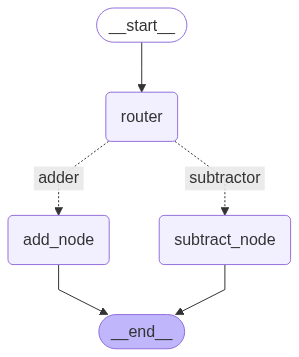

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result= app.invoke({"number1": 5, "number2": 3, "operation": "+"})
print(result)

{'number1': 5, 'number2': 3, 'operation': '+', 'result': 8}
